#### K Means Clustering
-   Unsupervised Learning
-   centroid based method
-   based on distance between a data point and the cluster centroids , it is determined that the specific data point should belong to which cluster.
-   centroid value will get changed when a new data point enters the specific cluster.
-   Euclidean distance

In [1]:
import pandas as pd

In [2]:
df = pd.DataFrame(data = [[12,95],[10,86],[9,75],[11,98],[5,35],[6,56],[4,28]],columns=['Hours Studied','Marks'])

In [3]:
df.head()

,Hours Studied,Marks
0,12,95
1,10,86
2,9,75
3,11,98
4,5,35


In [4]:
c1 = df.iloc[0]
c2 = df.iloc[1]

In [5]:
print(f'the c1 cluster centroid is {c1}')
print(f'the c2 cluster centroid is {c2}')

the c1 cluster centroid is Hours Studied    12
Marks            95
Name: 0, dtype: int64
the c2 cluster centroid is Hours Studied    10
Marks            86
Name: 1, dtype: int64


In [6]:
d1 = df.iloc[2]

In [7]:
print(f"the data point to check distance is {d1}")

the data point to check distance is Hours Studied     9
Marks            75
Name: 2, dtype: int64


In [8]:
import numpy as np
c1 = np.array([c1])
c2 = np.array([c2])
d1 = np.array([d1])

#### Euclidean distance checking with Numpy

In [9]:
#lets find out the sum of square
sum_sq_c1 = np.sum(np.square(d1-c1))
sum_sq_c2 = np.sum(np.square(d1-c2))

In [10]:
ed_c1d1 = np.sqrt(sum_sq_c1)
ed_c2d1 = np.sqrt(sum_sq_c2)

In [11]:
print(f"the euclidean distance between c1 cluster centroid and d1 data point is {ed_c1d1}")
print(f"the euclidean distance between c2 cluster centroid and d1 data point is {ed_c2d1}")

the euclidean distance between c1 cluster centroid and d1 data point is 20.223748416156685
the euclidean distance between c2 cluster centroid and d1 data point is 11.045361017187261


#### Euclidean distance checking with Sklearn

In [12]:
from sklearn.metrics.pairwise import euclidean_distances

In [13]:
ed_c1d1_sk = euclidean_distances(d1,c1)
ed_c2d1_sk = euclidean_distances(d1,c2)
print(f"the euclidean distance between c1 cluster centroid and d1 data point is {ed_c1d1_sk}")
print(f"the euclidean distance between c2 cluster centroid and d1 data point is {ed_c2d1_sk}")

the euclidean distance between c1 cluster centroid and d1 data point is [[20.22374842]]
the euclidean distance between c2 cluster centroid and d1 data point is [[11.04536102]]


In [14]:
c2

array([[10, 86]], dtype=int64)

In [15]:
c2 = (c2+d1)/2
print(f"the new c2 value is {c2}")

the new c2 value is [[ 9.5 80.5]]


In [16]:
d1

array([[ 9, 75]], dtype=int64)

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

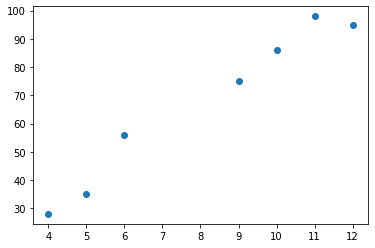

In [18]:
plt.scatter(df['Hours Studied'],df['Marks'])

In [19]:
scaler = MinMaxScaler()
df = scaler.fit_transform(df)

In [20]:
df

array([[1.        , 0.95714286],
       [0.75      , 0.82857143],
       [0.625     , 0.67142857],
       [0.875     , 1.        ],
       [0.125     , 0.1       ],
       [0.25      , 0.4       ],
       [0.        , 0.        ]])

In [21]:
km = KMeans(n_clusters=2)

In [22]:
ypred = km.fit_predict(df)

d:\Anaconda\envs\github1\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [23]:
ypred

array([0, 0, 0, 0, 1, 1, 1])

In [25]:
df = pd.DataFrame(df)

In [26]:
df['cluster'] = ypred

In [27]:
df

,0,1,cluster
0,1.000,0.957143,0
1,0.750,0.828571,0
2,0.625,0.671429,0
3,0.875,1.000000,0
4,0.125,0.100000,1
5,0.250,0.400000,1
6,0.000,0.000000,1
